In [1]:
import pandas as pd
import numpy as np
data_path = "C:\\Users\\欸？\\Desktop\\金融科技导论\\实验7\\实验7\\bank-additional-full.csv"

In [2]:
bk_data = pd.read_csv(data_path,sep=';')

In [3]:
#查看数据集的基本信息
print(bk_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#查看数据的数值特点
print(bk_data.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [7]:
for col in bk_data.columns:
    if bk_data[col].dtype == object:
        print("Percentage of \"unknown\" in %s:"%col, bk_data[bk_data[col]== 'unknown'][col].count()
                                                              ,'/',bk_data[col].count())

Percentage of "unknown" in job: 330 / 41188
Percentage of "unknown" in marital: 80 / 41188
Percentage of "unknown" in education: 1731 / 41188
Percentage of "unknown" in default: 8597 / 41188
Percentage of "unknown" in housing: 990 / 41188
Percentage of "unknown" in loan: 990 / 41188
Percentage of "unknown" in contact: 0 / 41188
Percentage of "unknown" in month: 0 / 41188
Percentage of "unknown" in day_of_week: 0 / 41188
Percentage of "unknown" in poutcome: 0 / 41188
Percentage of "unknown" in y: 0 / 41188


In [8]:
#统计正类样本占总样本数的比例
print("Yes:", bk_data['y'][bk_data['y']=='yes'].count())
print('No:', bk_data['y'][bk_data['y']=='no'].count())
#统计分类特征中各分量正样本占比
for col in bk_data.columns:
    if bk_data[col].dtype == object:
        print(bk_data.groupby(bk_data[col]).apply(lambda x:x['y'][x['y']=='yes'].count()
                                                 /x['y'].count()))

Yes: 4640
No: 36548
job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
dtype: float64
marital
divorced    0.103209
married     0.101573
single      0.140041
unknown     0.150000
dtype: float64
education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
dtype: float64
default
no         0.12879
unknown    0.05153
yes        0.00000
dtype: float64
housing
no         0.108796
unknown    0.108081
yes        0.116194
dtype: float64
loan
no         0.113402
unknown    0.108081
yes        0.109315
dtype: float64
contact
cellular  

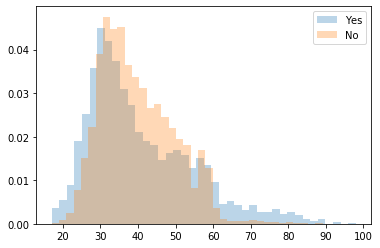

In [12]:
#正负样本比例随年龄的变化
import matplotlib.pyplot as plt
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
plt.hist(bk_data[bk_data['y']=='yes']['age'],label = "Yes", **kwargs) 
plt.hist(bk_data[bk_data['y']=='no']['age'],label = "No", **kwargs)
plt.legend()
plt.show()

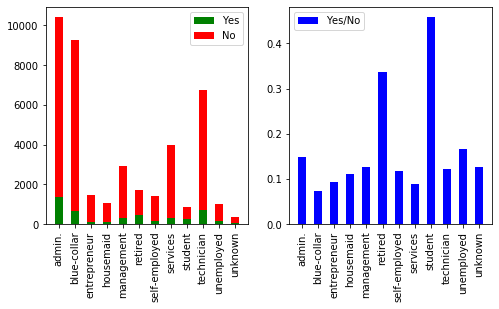

In [14]:
#不同职业正负样本占比
job = bk_data[bk_data['y']=='yes'].groupby('job').count()['y'].index
job_count_yes = bk_data[bk_data['y']=='yes'].groupby('job').count()['y']
job_count_no = bk_data[bk_data['y']=='no'].groupby('job').count()['y']
width = 0.5
plt.figure(figsize=(8, 4)) 
plt.subplot(121)
plt.bar(job,job_count_yes, width, color='green', label='Yes')
plt.bar(job,job_count_no, width, bottom = job_count_yes, color='red', label='No')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(122)
plt.bar(job,job_count_yes/job_count_no, width, color='blue', label='Yes/No')
plt.xticks(rotation=90)
plt.legend()
plt.show()

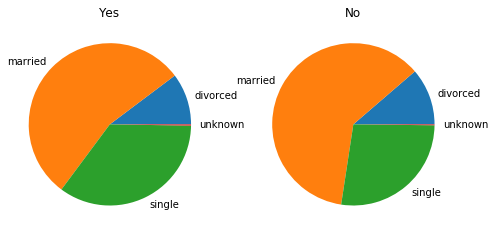

In [15]:
#正负样本中不同婚姻状态的占比
marital = bk_data[bk_data['y']=='yes'].groupby('marital').count()['y'].index
marital_count_yes = bk_data[bk_data['y']=='yes'].groupby('marital').count()['y']
marital_count_no = bk_data[bk_data['y']=='no'].groupby('marital').count()['y']
plt.figure(figsize=(8, 4)) 
plt.subplot(121)
plt.title('Yes')
plt.pie(marital_count_yes.values,labels = marital)
plt.subplot(122)
plt.title('No')
plt.pie(marital_count_no.values,labels = marital)
plt.show()

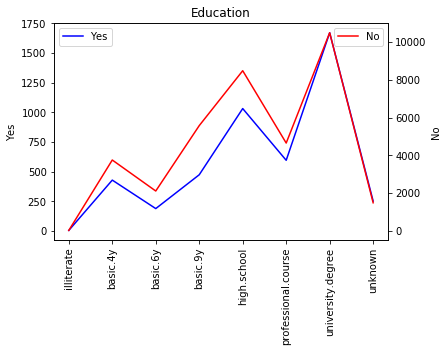

In [16]:
edu =  ["illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school",  "professional.course", "university.degree","unknown"]
education_count_yes = bk_data[bk_data['y']=='yes'].groupby('education').count()['y']
education_count_no = bk_data[bk_data['y']=='no'].groupby('education').count()['y']
#按照学历对数据行重新排序
education_count_yes = education_count_yes.reindex(index=edu)
education_count_no = education_count_no.reindex(index=edu)
y = education_count_yes
n = education_count_no
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xticks(rotation=90)
ax1.plot(y.values,'b',label = "Yes")
ax1.set_xticks(np.arange(len(edu)))
ax1.set_xticklabels(edu)
ax1.set_ylabel('Yes')
ax1.set_title("Education")
plt.legend()
ax2 = ax1.twinx()
ax2.plot(n.values, 'r',label = "No")
ax2.set_xticks(np.arange(len(edu)))
ax2.set_xticklabels(edu)
ax2.set_ylabel('No')
plt.legend()
plt.show()

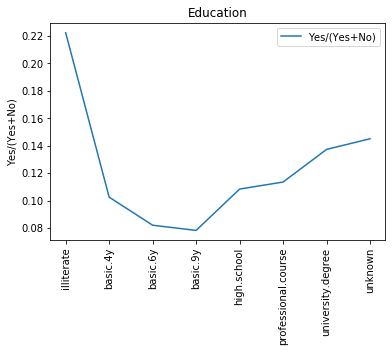

In [17]:
edu =  ["illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school",  "professional.course", "university.degree","unknown"]
education_count_yes = bk_data[bk_data['y']=='yes'].groupby('education').count()['y']
education_count_no = bk_data[bk_data['y']=='no'].groupby('education').count()['y']
#按照学历对数据行重新排序
education_count_yes = education_count_yes.reindex(index=edu)
education_count_no = education_count_no.reindex(index=edu)
index = education_count_yes.index
fig = plt.figure(figsize=(6, 4))
axes=fig.add_subplot(1,1,1)
axes.plot((education_count_yes/(education_count_yes+education_count_no)).values,label = 'Yes/(Yes+No)')
axes.set_xticks(np.arange(len(edu)))
axes.set_xticklabels(edu)
axes.set_title("Education")
axes.set_ylabel('Yes/(Yes+No)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

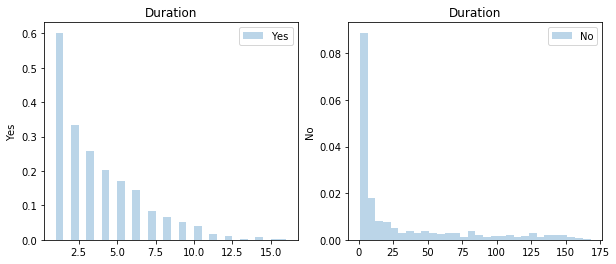

In [19]:
duration_count_yes = bk_data[bk_data['y']=='yes'].groupby('duration').count()['y']
duration_count_no = bk_data[bk_data['y']=='no'].groupby('duration').count()['y']
fig = plt.figure(figsize=(10, 4))

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=30)
plt.subplot(121)
plt.title("Duration")
plt.ylabel('Yes')
plt.hist(duration_count_yes,label = "Yes", **kwargs)
plt.legend()
plt.subplot(122)
plt.title("Duration")
plt.ylabel('No')
plt.hist(duration_count_no,label = "No", **kwargs)
plt.legend()
plt.show()